In [1]:
import tensorflow as tf
 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers import Input, LSTM, Dense, GlobalMaxPooling1D, Embedding
from tensorflow.keras.models import Model

from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1) #drop unnecessary coloumns

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# rename columns to something better
df.columns = ['labels', 'data']

In [10]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# labels r spam n ham, but tensorflow needs it as zero and 1 to run neural network

df['b_labels'] = df['labels'].map({'ham':0, 'spam':1})

In [14]:
Y = df['b_labels'].values
Y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(df['data'], Y, test_size=0.33) #split data

In [16]:
#convert words to integers
#ideally we only wanna fit on the train set, so we dont pass in the full dataset, just X_train

max_vocab=20000

tokenizer= Tokenizer(num_words= max_vocab)
tokenizer.fit_on_texts(X_train)
sequences_train= tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

In [17]:
index = tokenizer.word_index   # find number of words found
V = len(index)
print ('words = ', V)

words =  7182


In [19]:
#7182 words found, much less than thw 20000 we had denoted

data_train= pad_sequences(sequences_train)
data_train.shape

(3733, 189)

In [20]:
# get sequence length
T = data_train.shape[1]

In [21]:
T

189

In [22]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1839, 189)


In [23]:
# Create the model

# We get to choose embedding dimensionality
D = 20

# Hidden state dimensionality
M = 15

# Note: we actually want to the size of the embedding to (V + 1) x D,
# because the first index starts from 1 and not 0.
# Thus, if the final index of the embedding matrix is V,
# then it actually must have size V + 1.
# sigmoid used as output is binary, spam or not spam

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [25]:
# Compile and fit
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


print('Training model...')
r = model.fit(
  data_train,
  Y_train,
  epochs=10,
  validation_data=(data_test, Y_test)
)

Training model...
Train on 3733 samples, validate on 1839 samples
Epoch 1/10
3733/3733 [==============================] - 9s 2ms/sample - loss: 0.4625 - accuracy: 0.8599 - val_loss: 0.3343 - val_accuracy: 0.8777
Epoch 2/10
3733/3733 [==============================] - 7s 2ms/sample - loss: 0.3050 - accuracy: 0.8602 - val_loss: 0.2595 - val_accuracy: 0.8777
Epoch 3/10
3733/3733 [==============================] - 7s 2ms/sample - loss: 0.2409 - accuracy: 0.8602 - val_loss: 0.2115 - val_accuracy: 0.8777
Epoch 4/10
3733/3733 [==============================] - 7s 2ms/sample - loss: 0.1758 - accuracy: 0.9113 - val_loss: 0.1534 - val_accuracy: 0.9674
Epoch 5/10
3733/3733 [==============================] - 7s 2ms/sample - loss: 0.1093 - accuracy: 0.9885 - val_loss: 0.1130 - val_accuracy: 0.9734
Epoch 6/10
3733/3733 [==============================] - 7s 2ms/sample - loss: 0.0681 - accuracy: 0.9920 - val_loss: 0.0901 - val_accuracy: 0.9810
Epoch 7/10
3733/3733 [==============================] - 7s

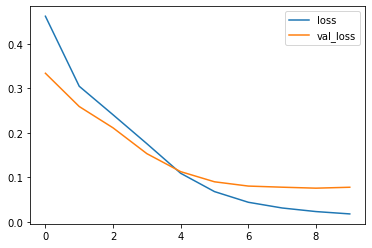

In [26]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

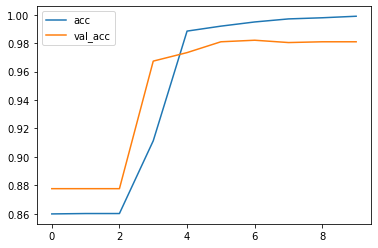

In [27]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [28]:
data_train

array([[   0,    0,    0, ...,  109,   94,  262],
       [   0,    0,    0, ...,    1,  110, 1016],
       [   0,    0,    0, ...,  138, 1828,  726],
       ...,
       [   0,    0,    0, ...,  417, 1038,  354],
       [   0,    0,    0, ...,   29,   11, 3256],
       [   0,    0,    0, ...,   63,  106,  272]])

In [29]:
Y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)